In [33]:
import numpy as np
import cv2
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread(r'C:\bird.png') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

In [35]:
width = int(image.shape[1] * 30 / 100)
height = int(image.shape[0] * 30 / 100)
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

rows, cols, _ = resized_image.shape
features = np.zeros((rows * cols, 3))
features[:, :3] = resized_image.reshape(-1, 3)  # add RGB values to features

# Normalize features 
features = StandardScaler().fit_transform(features)

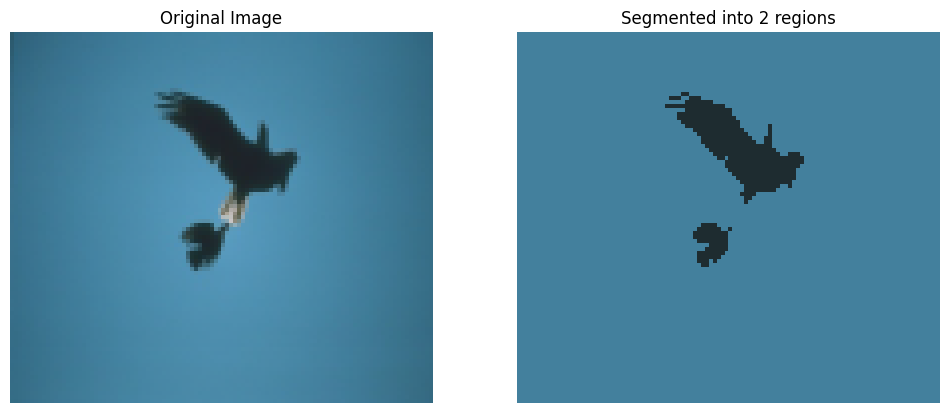

In [36]:
# Spectral Clustering
n_clusters = 2  
model = SpectralClustering(
    n_clusters=n_clusters,
    affinity='rbf', 
    gamma=1.0,  
    assign_labels='kmeans',  
    random_state=42
)
labels = model.fit_predict(features)

segmented_labels = labels.reshape(rows, cols)

# averaged color visualization
averaged_image = np.zeros_like(resized_image)
for label in np.unique(labels):
    mask = segmented_labels == label
    for channel in range(3):
        averaged_image[mask, channel] = resized_image[mask, channel].mean()

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(resized_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(averaged_image)
plt.title(f'Segmented into {n_clusters} regions')
plt.axis('off')
plt.show()